# **Análisis exploratorio y estadística**

# AE11 - CAPSTONE - Reconstrucción análisis 538 - Fandango

## <font color='blue'>**Contexto**</font>

__[FiveThirtyEight](https://fivethirtyeight.com/)__, a veces representado como __538__, es un sitio web estadounidense que se centra en el análisis de encuestas de opinión, la política, la economía y los blogs deportivos.

En octubre de 2015, publico un análisis que tituló "Be Suspicious Of Online Movie Ratings, Especially Fandango’s" (Sospeche de las clasificaciones de películas en línea, especialmente de Fandango), en el cual analizaba y cuestionaba el hecho que __la misma empresa__ (Fandango) tenía un __conflicto de interés__ al __publicar las calificaciones__ de las películas y __vender entradas__ al mismo tiempo.

<img src="https://drive.google.com/uc?export=view&id=1ErZN_tzjnzNRHjsPN-Ha2zpB_1_IU_6I" width='900'>


## <font color='blue'>**Preguntas de investigación**</font>
1. ¿Tienen Fandango alguna predisposición a calificar las películas por encima de lo que deberían calificar?
2. ¿Hay evidencias de conflicto de interés en un sitio web que nos entrega las calificaciones de las películas y que, además, nos vende entradas?


## <font color='blue'>**Misión**</font>
Su objetivo es completar las actividades a continuación basándose en el artículo __538__ mencionado, y ver si llega a una conclusión similar. Utilice los conocimientos adquiridos (`Pandas`, `Numpy`,`Malplotlib`, visualización y estadísticas) para determinar si las calificaciones de Fandango en 2015 tenían un sesgo hacia calificar mejor las películas para vender más boletos.



## <font color='blue'>__Ejercicios__</font>

### <font color='green'>**Actividad 1**</font>
### Investigación de los antecedentes y los datos


1. Lea el artículo: [Sospeche de las calificaciones de películas en línea, especialmente las de Fandango](http://fivethirtyeight.com/features/fandango-movies-ratings/)
2. Lea los datasets del estudio. Hay dos archivos csv, uno con las calificaciones de Fandango (`fandango_scrape.csv`), y el otro con datos agregados para clasificaciones de películas de otros sitios, como Metacritic, IMDB y Rotten Tomatoes (`all_sites_scores.csv`). Los datos de Fandango se extrajeron el 24 de agosto de 2015, y contienen al menos 3 valoraciones de usuarios por película.
3. Explore las características de ambos datasets.

__Descripción de all_sites_scores.csv__

Columna | Contenido
--- | -----------
FILM | La película analizada
RottenTomatoes | Rotten Tomatoes Tomatometer valoración para la película
RottenTomatoes_User | Rotten Tomatoes valoración de usuario para la película
Metacritic | Metacritic valoración para la película
Metacritic_User | Metacritic valoración de usuario para la película
IMDB | IMDb valoración de usuario para la película
Metacritic_user_vote_count | Número de votos de usuario que tuvo la película en Metacritic
IMDB_user_vote_count | Número de votos de usuario que tuvo la película en IMDb


__Descripción de fandango_scrape.csv__

Contiene todas las películas analizadas por el sitio __538__.

Columna | Contenido
--- | ---------
FILM | La película analizada
STARS | Valoración en estrellas presentada en Fandango.com
RATING |El valor de calificación de Fandango para la película, extraído del HTML de cada página. Esta es la puntuación media real que obtuvo la película.
VOTES | Cantidad de personas que habían revisado la película en el momento en que la sacamos.

In [ ]:
# Tu código aquí ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Leemos los archivos
fandango = pd.read_csv("/content/drive/MyDrive/BITACORA - Grupo 3/03 ANALISIS EXPLORATORIO Y ESTADISTICA/Archivos/fandango_scrape.csv")
all_sites = pd.read_csv("/content/drive/MyDrive/BITACORA - Grupo 3/03 ANALISIS EXPLORATORIO Y ESTADISTICA/Archivos/all_sites_scores.csv")
# fandango = pd.read_csv("fandango_scrape.csv")
# all_sites = pd.read_csv("all_sites_scores.csv")

## Análisis Fandango

In [ ]:
#Características de dataset Fandango
# Revisamos las caracterísiticas generales del dataframe usando los métodos info() y describe().
fandango.info()
print()
fandango.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB



,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Se observa que:
* El dataset `fandango_scrape` está compuesto de 504 registros y 4 variables, de las cuales 3 son numéricas.
* La media de rating de películas es de 3.38, y su desviación standar es de 1.49. La mediana es 3.8.

A continuación veremos una inspección de los datos, y algunas gráficas generales.

In [ ]:
#Inspección general a la tabla
display(fandango)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


Se observa que hay registros que tienen 0 votos, a pesar que el enunciado mencionaba que se filtrarían para mantener aquellos de al menos 3 valoraciones.
Para hacer el análisis gráfico sin esos registros con pocos votos, usaremos una base filtrada.

In [ ]:
#Veremos cuantos datos menos de 3 votos existen
fandango[fandango['VOTES'] <= 2].shape[0]

123

Existen **123 registos con menos de 3 votos**. Crearemos una base depurada para excluir estos casos.

In [ ]:
#Base filtrada para registros con votos >= 3
fandango_filt = fandango[fandango['VOTES'] >= 3]
fandango_filt.describe()

,STARS,RATING,VOTES
count,381.000000,381.000000,381.000000
mean,4.164042,3.927559,1518.241470
std,0.598237,0.588085,4342.731978
min,2.000000,1.500000,3.000000
25%,4.000000,3.500000,11.000000
50%,4.000000,4.000000,44.000000
75%,4.500000,4.400000,729.000000
max,5.000000,5.000000,34846.000000


La base filtrada tiene **381** registros. Construiremos algunos gráficos descriptivos.

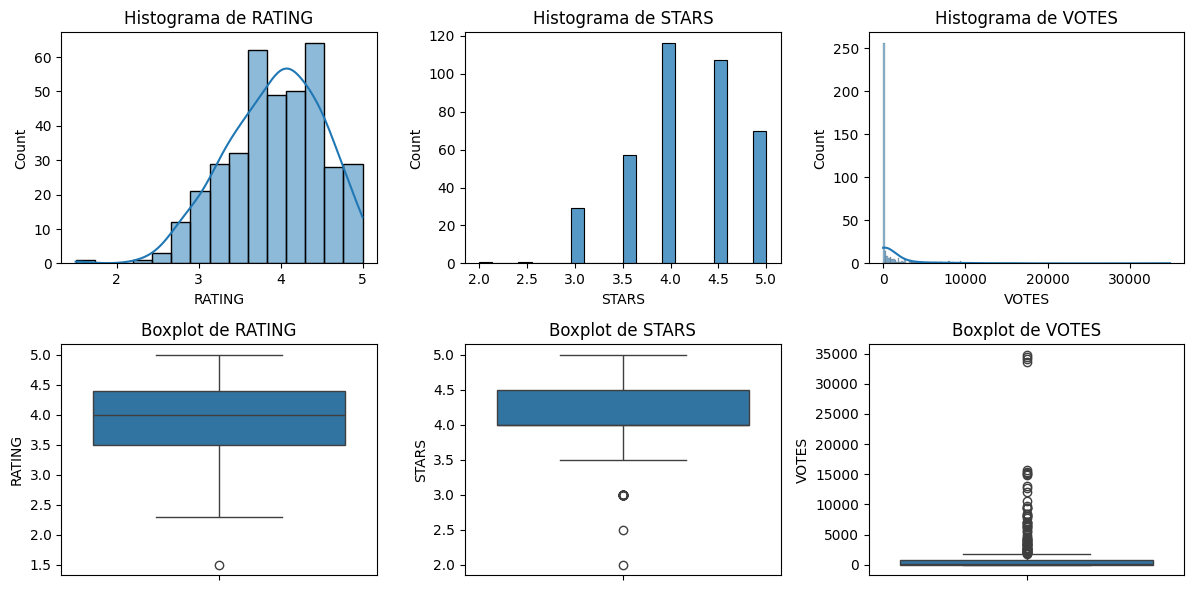

In [ ]:
# Seteo del Figure
plt.figure(figsize=(12, 6))

# Histplot: RATING
plt.subplot(2, 3, 1)
sns.histplot(x='RATING', data = fandango_filt, kde=True)
plt.title('Histograma de RATING')

# Histplot: STARS
plt.subplot(2, 3, 2)
sns.histplot(x='STARS', data = fandango_filt)
plt.title('Histograma de STARS')

# Histplot: VOTES
plt.subplot(2, 3, 3)
sns.histplot(x='VOTES', data = fandango_filt, kde=True)
plt.title('Histograma de VOTES')

# Boxplot: RATING
plt.subplot(2, 3, 4)
sns.boxplot(y='RATING', data = fandango_filt)
plt.title('Boxplot de RATING')

# Boxplot: STARS
plt.subplot(2, 3, 5)
sns.boxplot(y='STARS', data = fandango_filt)
plt.title('Boxplot de STARS')

# Boxplot: VOTES
plt.subplot(2, 3, 6)
sns.boxplot(y='VOTES', data = fandango_filt)
plt.title('Boxplot de VOTES')

plt.tight_layout()
plt.show()

De los gráficos se observa que:
* La variable RATING tiene media y mediana próximas al valor 4.
* La variable STARS, que es discreta, tiene el percentil 25% y la mediana iguales al valor 4.
* Para la variable VOTES, la mediana es de 44 votos, pero el promedio es de 1518, porque existen algunas películas muy populares que concentran una alta votación. Corresponde a un caso de Asimetría Positiva.


## Análisis All_Sites

In [ ]:
#Características de dataset All_sites
# Revisamos las caracterísiticas generales del dataframe usando los métodos info() y describe().
all_sites.info()
print()
all_sites.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB



,count,mean,std,min,25%,50%,75%,max
RottenTomatoes,146.0,60.849315,30.168799,5.0,31.25,63.50,89.00,100.0
RottenTomatoes_User,146.0,63.876712,20.024430,20.0,50.00,66.50,81.00,94.0
Metacritic,146.0,58.808219,19.517389,13.0,43.50,59.00,75.00,94.0
Metacritic_User,146.0,6.519178,1.510712,2.4,5.70,6.85,7.50,9.6
IMDB,146.0,6.736986,0.958736,4.0,6.30,6.90,7.40,8.6
Metacritic_user_vote_count,146.0,185.705479,316.606515,4.0,33.25,72.50,168.50,2375.0
IMDB_user_vote_count,146.0,42846.205479,67406.509171,243.0,5627.00,19103.00,45185.75,334164.0


Se observa que:
* El dataset `all_sites` está compuesto de 146 registros y 8 variables, de los cuales 7 son numéricas.
* Los ranking tienen distintas escalas:
  * Los de Rotten Tomatoes, y el Metacritic - expertos tienen escala de 0 a 100.
  * El IMDB y el Metacritic - ususario tienen escala de 1 a 10.
* La media de los diversos rating se mueve en el rango de de 59% a 67% de valoración.
* El número de votantes de IMDB es extraordinariamente alto comparado por el de Metacritic por ejemplo. En términos generales, es volumen de votantes es más de 200 veces mayor.

A continuación veremos una inspección de los datos, y algunas gráficas generales.

In [ ]:
#Inspección general a la tabla
display(all_sites)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


A continuación presentararemos algunos graficos descriptivos sobre la información del dataset.

Primero revisaremos gráficos asociados a la evaluación de las péliculas según los diversos rankings.

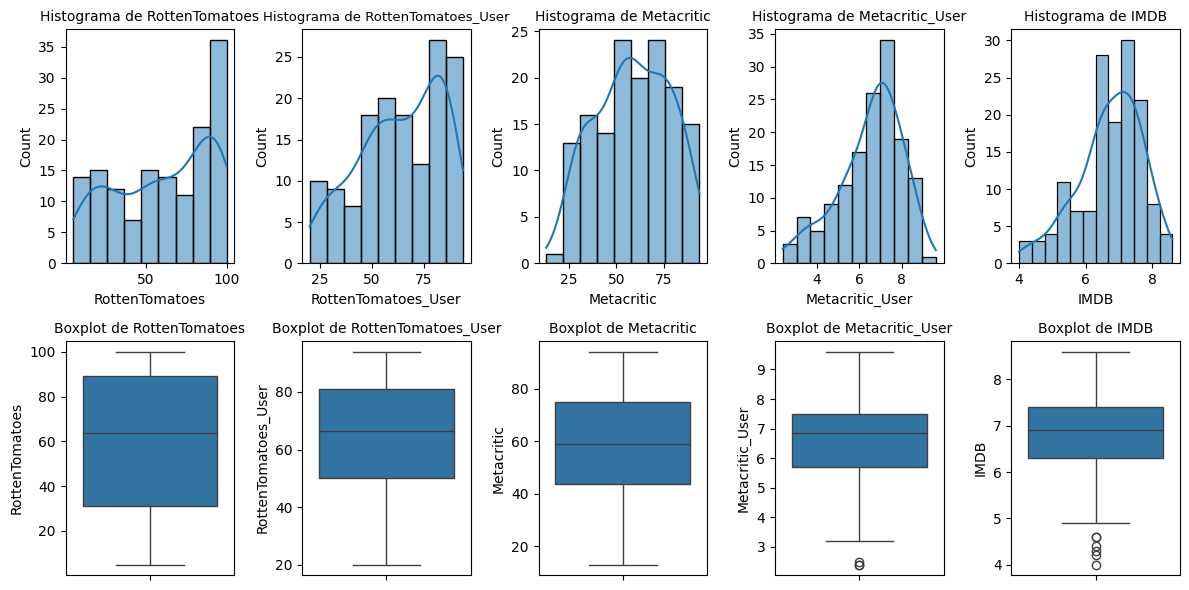

In [ ]:
# Seteo del Figure
plt.figure(figsize=(12, 6))

# Histplot: RottenTomatoes
plt.subplot(2, 5, 1)
sns.histplot(x='RottenTomatoes', data = all_sites, kde=True)
plt.title('Histograma de RottenTomatoes', fontsize = 10)

# Histplot: RottenTomatoes_User
plt.subplot(2, 5, 2)
sns.histplot(x='RottenTomatoes_User', data = all_sites, kde=True)
plt.title('Histograma de RottenTomatoes_User', fontsize = 9.5)

# Histplot: Metacritic
plt.subplot(2, 5, 3)
sns.histplot(x='Metacritic', data = all_sites, kde=True)
plt.title('Histograma de Metacritic', fontsize = 10)

# Histplot: Metacritic_User
plt.subplot(2, 5, 4)
sns.histplot(x='Metacritic_User', data = all_sites, kde=True)
plt.title('Histograma de Metacritic_User', fontsize = 10)

# Histplot: IMDB
plt.subplot(2, 5, 5)
sns.histplot(x='IMDB', data = all_sites, kde=True)
plt.title('Histograma de IMDB', fontsize = 10)

# Boxplot: RottenTomatoes
plt.subplot(2, 5, 6)
sns.boxplot(y='RottenTomatoes', data = all_sites)
plt.title('Boxplot de RottenTomatoes', fontsize = 10)

# Boxplot: RottenTomatoes_User
plt.subplot(2, 5, 7)
sns.boxplot(y='RottenTomatoes_User', data = all_sites)
plt.title('Boxplot de RottenTomatoes_User', fontsize = 10)

# Boxplot: Metacritic
plt.subplot(2, 5, 8)
sns.boxplot(y='Metacritic', data = all_sites)
plt.title('Boxplot de Metacritic', fontsize = 10)

# Boxplot: Metacritic_User
plt.subplot(2, 5, 9)
sns.boxplot(y='Metacritic_User', data = all_sites)
plt.title('Boxplot de Metacritic_User', fontsize = 10)

# Boxplot: IMDB
plt.subplot(2, 5, 10)
sns.boxplot(y='IMDB', data = all_sites)
plt.title('Boxplot de IMDB', fontsize = 10)

plt.tight_layout()
plt.show()

De los gráficos se observa que:
* La media de los diversos rating se mueve en el rango de de 59% a 67% de valoración.
* La variable RottenTomatoes-interno tiene la mayor dispersión entre los rankings.
* La variable IMDB tiene la menor dispersión entre los rankings.
* Tanto para los rankings Rotten Tomatoes como Metacritic, la versión de usuarios tienen menor dispersión que la versión experta.


<font color='green'>Fin actividad 1</font>

### <font color='green'>**Actividad 2**</font>

### Explorando las valoraciones mostradas en Fandango frente a las puntuaciones reales de los usuarios

Exploremos las calificaciones de Fandango para ver si nuestro análisis está de acuerdo con la conclusión del artículo.

1. Explore la relación entre la popularidad de una película y su calificación. Cree un diagrama de dispersión que muestre la relación entre la calificación y los votos.
2. Calcule la correlación entre las distintas variables y visualícelas.
3. Calcule cuántas películas hay en Fandango por año y visualice.
4. Cuáles son las 10 películas con más votaciones?
5. Cuántas películas tienen cero votos?
6. Cree un nuevo DataFrame con las películas que tienen al menos un voto



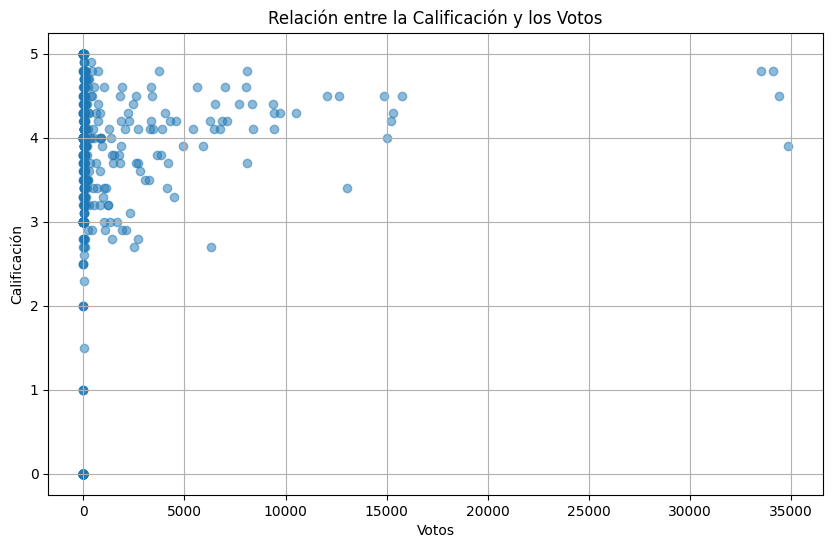

In [ ]:
# Tu código aquí ...
# 1. Relación entre la popularidad de una película y su calificación

# Mostraremos un gráfico de dispersión con las variabales RATING y VOTES
plt.figure(figsize=(10, 6))
plt.scatter(fandango['VOTES'], fandango['RATING'], alpha=0.5)
plt.title('Relación entre la Calificación y los Votos')
plt.xlabel('Votos')
plt.ylabel('Calificación')
plt.grid(True)
plt.show()

La gráfica de dispersión está muy afectada por los casos de menor popularidad.
Crearemos un dataser filtrado para películas con más de 1000 votos, para apreciar mejor una eventual tendencia

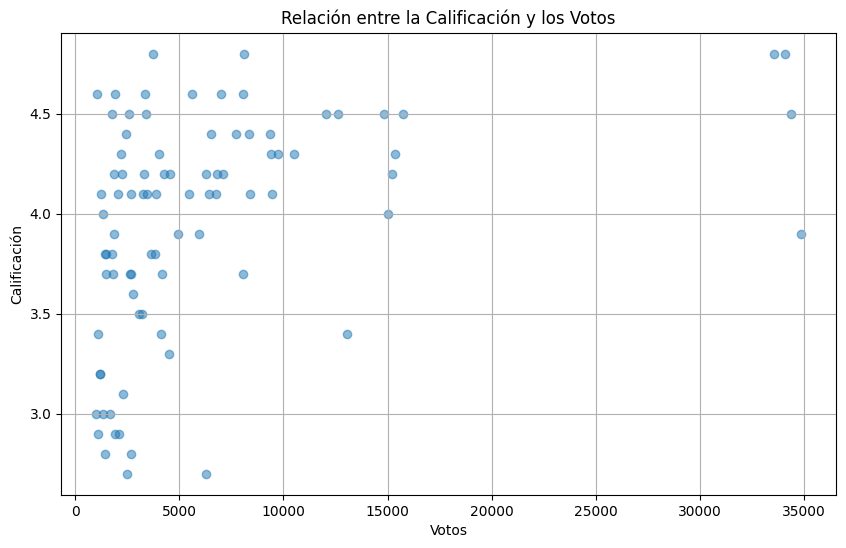

In [ ]:
#Base filtrada para registros con votos >= 1000
fandango_filt_1000 = fandango[fandango['VOTES'] >= 1000]

plt.figure(figsize=(10, 6))
plt.scatter(fandango_filt_1000['VOTES'], fandango_filt_1000['RATING'], alpha=0.5)
plt.title('Relación entre la Calificación y los Votos')
plt.xlabel('Votos')
plt.ylabel('Calificación')
plt.grid(True)
plt.show()

En esta gráfica se muestra que películas con menos de 5000 votantes casi no presentan notas inferiores a 4. Por lo tanto, se verifica la ocurrencia de una característica singular respecto al resto del dataset, pero no es posible definir si existe causalidad entre las variables.

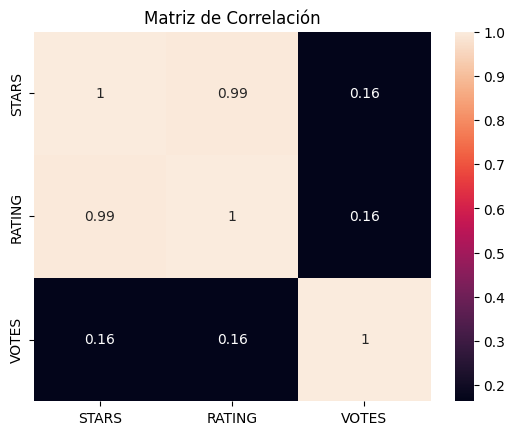

In [ ]:
# 2. Correlación entre las distintas variables

# Obtenemos la matriz de correlación para las variables númericas del set de datos
corr = fandango.corr(numeric_only=True)
sns.heatmap(corr, annot=True) #Generamos el heatmap
plt.title('Matriz de Correlación')
plt.show()

Del análisis de correlación se observa que:
* STARS vs. RATING: 0.99. Correlación muy alta, lo cual es lógico porque de alguna manera la variable STARS es dependiente de la variable RATING.
* VOTES vs. RATING: 0.16. Es un coeficiente muy bajo, indicando que la popularidad y la calificación no necesariamente están relacionadas.
* VOTES vs. STARS: 0.16. Similar a caso anterior.

Como una variante del análisis, exploraremos la correlación para el dataset de valores filtrados con más de 1000 votos.

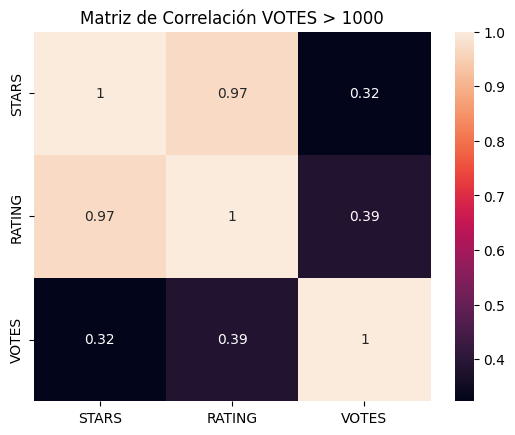

In [ ]:
# Análisis para dataset con más de 1000 votos

# Obtenemos la matriz de correlación para las variables númericas del set de datos
corr = fandango_filt_1000.corr(numeric_only=True)
sns.heatmap(corr, annot=True) #Generamos el heatmap
plt.title('Matriz de Correlación VOTES > 1000')
plt.show()

En este subconjunto, se aprecia que la correlación entre popularidad y rating aumenta respecto al caso original, pero aún así se mantiene en un nivel bajo que no permite concluir la existencia de una relación de predictibilidad entre ellas.

In [ ]:
# 3. Calcule cuántas películas hay en Fandango por año y visualice.

# Para responder esta pregunta debemos agregar una columna al dataset que entregue el año de la película,
# el que aparece en el campo FILM, rodeado entre paréntesis.
# Para ello usaremos el método extract

fandango['YEAR'] = fandango['FILM'].str.extract(r'\((\d{4})\)').astype(int)

fandango.head(5)



,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [ ]:
# Una vez creado el campo YEAR, podemos contar el número de películas por año y graficar.

peli_for_year = fandango['YEAR'].value_counts()
print("Tabla de Películas por Año")
peli_for_year.sort_index(axis = 0, ascending = False)

Tabla de Películas por Año


,count
YEAR,
2016,1
2015,477
2014,24
2012,1
1964,1


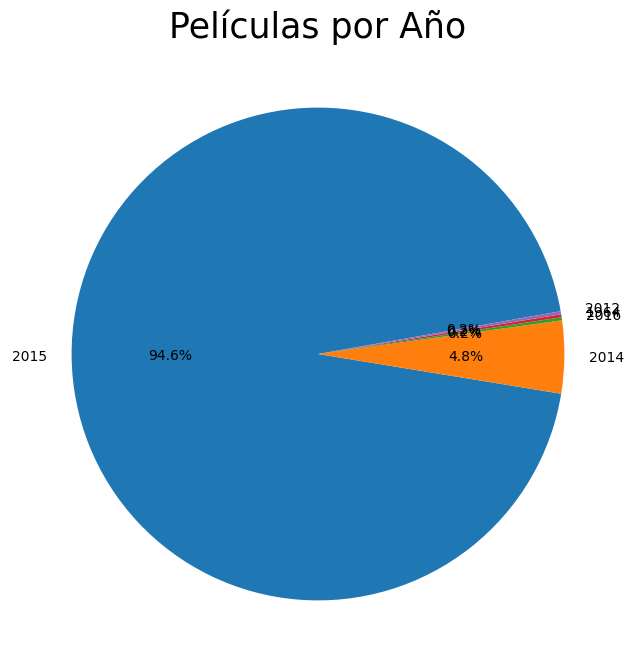

In [ ]:
# Ahora crearemos un gráfico.

plt.figure(figsize=(8, 8 ))
peli_for_year.plot.pie(autopct='%1.1f%%', startangle=10)
plt.title('Películas por Año', fontsize=25)
plt.ylabel('')  # Hide y-label as it's unnecessary
plt.show()


Se observa que 477 (94.6%) de las películas corresponden al año 2015, y 24 (4.8%) al año 2014. Hay una pélicula de los año 2016, 2012 y 1964.

In [ ]:
# 4. Las 10 películas con más votos

# Para identificar las películas más votadas usaremos el método nlargest

popular_10 = fandango.nlargest(10, 'VOTES')
print("TABLA DE 10 PELÍCULAS MÁS POPULARES")
popular_10

TABLA DE 10 PELÍCULAS MÁS POPULARES


,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [ ]:
# 5. Cuántas películas tienen cero votos

# Para determinar aquellas películas sin votos, implementaremos un filtro.
sin_votos = fandango[fandango['VOTES'] == 0].shape[0]
print(f"Las películas sin votos suman {sin_votos} registros.")

Las películas sin votos suman 69 registros.


In [ ]:
# 6. Creamos una nuevo DataFrame con las películas con al menos una valoración

# Para crear un nuevo dataframe, aplicaremos un filtro al set original.

fandango_filt_1 = fandango[fandango['VOTES'] > 0]
fandango_filt_1.describe()

,STARS,RATING,VOTES,YEAR
count,435.000000,435.000000,435.000000,435.000000
mean,4.122989,3.911264,1329.937931,2014.947126
std,0.706569,0.691447,4094.328212,0.234097
min,1.000000,1.000000,1.000000,2014.000000
25%,3.500000,3.500000,6.000000,2015.000000
50%,4.000000,4.000000,28.000000,2015.000000
75%,4.500000,4.400000,404.500000,2015.000000
max,5.000000,5.000000,34846.000000,2016.000000


Se verifica que el valor mínimo de la variable VOTES en el nuevo data set es 1, y el tamaño se redujo a 435 registros.

<font color='green'>Fin actividad 2</font>

### <font color='green'>**Actividad 3**</font>

En un sistema de redondeo normal, un sitio redondearía a la media estrella de valoración más cercana, hacia arriba o hacia abajo. Como se indica en el artículo, el sistema de redondeo de Fandango, y a modo de ejemplo, en el caso de "Ted 2", esperaríamos que la calificación se redondeara a 4 estrellas (dado que la valoración es de usuarios es 4.1). Sin embargo, Fandango redondeó el "ratingValue" hacia arriba, hasta un 4.5. Esto nos demuestra que la calificación real del usuario puede ser ligeramente diferente a la calificación que se le muestra a un usuario en el sitio web.
Visualice esta diferencia en distribuciones.

1. Verifique con gráficos KDE rellenos si las distribuciones de las calificaciones que se muestran (STARS) son distintas a la calificación real de los votos (RATING). Tip: recorte los KDE a 0-5 con
`clip=[0,5]`

2. Si es que en el punto anterior hay una diferencia, cuantifíquela y añádala en una nueva columna del DataFrame. Esta nueva columna debe quedar expresada con un decimal.

3. Grafique la cantidad de veces que cada diferencia (0.1, 0.2, 0.3, etc.) se produce.

4. ¿Qué película(s) tiene(n) un diferencial de más de media estrella?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

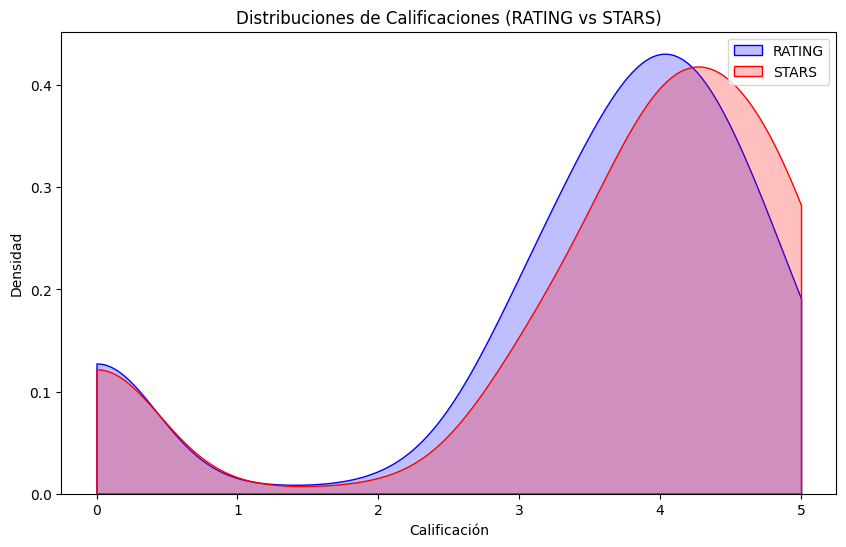

In [ ]:
# Tu código aquí ...
# 1. Comparamos los KDEs

# Crear las distribuciones KDE de las calificaciones
plt.figure(figsize=(10, 6))

# Graficar la distribución KDE de las calificaciones reales (RATING)
sns.kdeplot(fandango['RATING'], fill=True, color='blue', label='RATING', clip=[0, 5])

# Graficar la distribución KDE de las calificaciones mostradas (STARS)
sns.kdeplot(fandango['STARS'], fill=True, color='red', label='STARS', clip=[0, 5])

plt.title('Distribuciones de Calificaciones (RATING vs STARS)')
plt.xlabel('Calificación')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Podemos visualizar que las mayores diferencias se producen entre las calificaciones mayores a 2. Cuando se encuentra entre dos y cuatro aproximadamente, es mayor RAITING, pero si es mayor a cuatro aproximadamente es mayor STAR.

Para asegurar lo anterior alcularemos las diferencias entre ambas mediciones.

In [ ]:
# 2. Cuantifiquemos ahora realmente esta discrepancia.

# Calcular la diferencia entre STARS y RATING
fandango['DIFERENCIA'] = (fandango['STARS'] - fandango['RATING']).round(1)

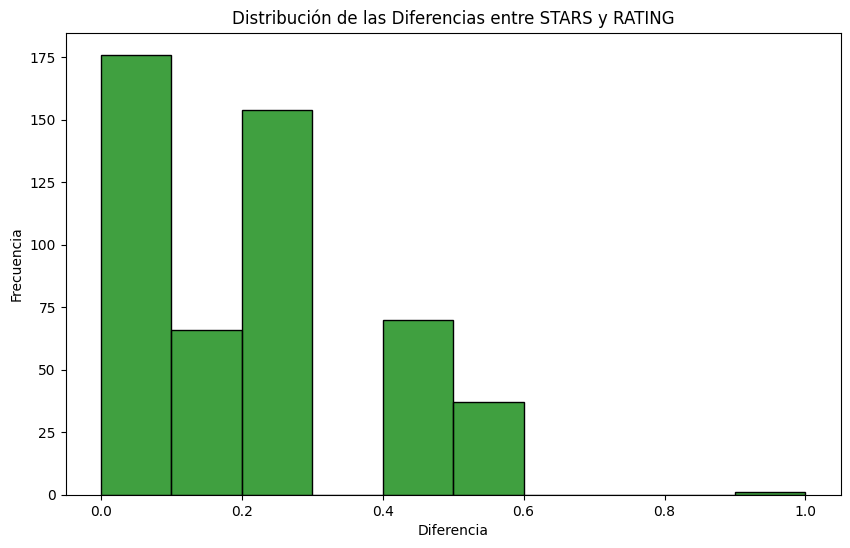

In [ ]:
# 3. Cantidad de veces que las diferencias se producen.

# Gráfico de las diferencias
plt.figure(figsize=(10, 6))
sns.histplot(fandango['DIFERENCIA'], bins=10, kde=False, color='green')
plt.title('Distribución de las Diferencias entre STARS y RATING')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.show()

Como podemos ver en el gráfico, efectivamente hay una diferencia, sin embargo las diferencias más bajas y cercanas a cero tienen una mayor frecuencia que las diferencias más altas. La diferencia de 0.1 es la que ocurre con mayor frecuencia.

In [ ]:
# 4. Buscamos la pelicula con una diferencia de una estrella

# Identificar las películas con una diferencia mayor a 0.5 estrellas
peliculas_grande_diferencia = fandango[fandango['DIFERENCIA'] > 0.5]

# Mostrar las películas con diferencia mayor a 0.5 estrellas
print(peliculas_grande_diferencia[['FILM', 'DIFERENCIA']])

                 FILM  DIFERENCIA
381  Turbo Kid (2015)         1.0


La película con diferencia de una estrella es Turbo Kid

<font color='green'>Fin actividad 3</font>

### <font color='green'>**Actividad 4**</font>
## Comparación de las valoraciones de Fandango con Rotten Tomatoes

Compare las valoraciones de Fandango con la de __Rotten Tomatoes__. Analice y comente las diferencias.

1. Analice __Rotten Tomatoes__ (__RT__). Observe cómo el sitio tiene dos valoraciones; una de críticos especializados y otra de usuarios. Realice una visualización de dispersión de ambas variables.

2. Determine la diferencia comparando las calificaciones de los críticos y las calificaciones de los usuarios de __RT__. Cree una nueva columna basada en la diferencia entre las calificaciones de los críticos y las calificaciones de los usuarios para Rotten Tomatoes. Calcule esto con `RottenTomatoes - RottenTomatoes_User`

3. Calcule la diferencia media absoluta obtenida en el punto 2. Atención con los valores negativos.

4. Visualice con 2 subplots horizontales:
  * La distribución de las diferencias entre `RT Critics Score` y `RT User Score`. Debe haber valores negativos en esta gráfica de distribución. Utilice KDE e histogramas para mostrar esta distribución.
  * La distribución que muestre la diferencia en valor absoluto.
  * Incluya un título a cada subplot y un título general a nivel del lienzo (figure).

5. ¿Cuáles son las 10 películas más valoradas por los usuarios en promedio que los críticos? Y ¿Cuáles son las 10 películas con mejores valoraciones de críticos de películas que de usuarios?

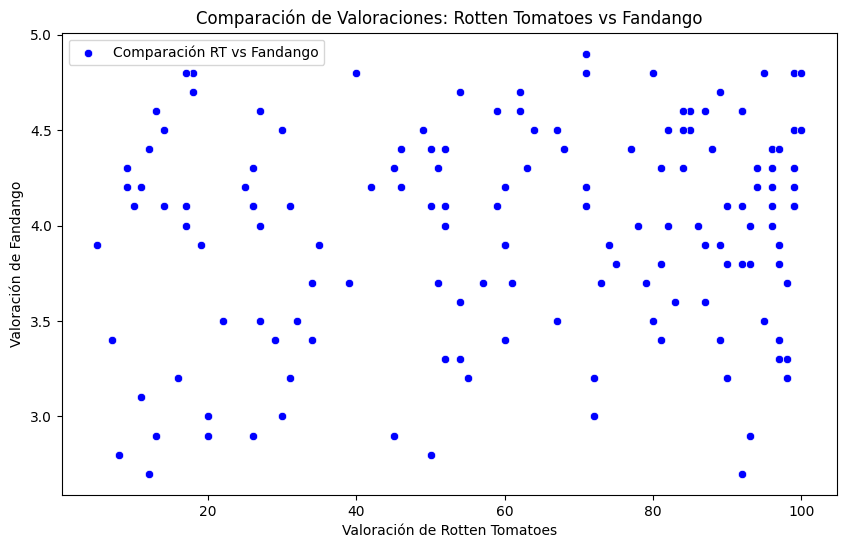

In [ ]:
# Tu código aquí ...

# 1. Dispersión de RT

#Comparación de las valoraciones de Fandango con Rotten Tomatoes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=all_sites['RottenTomatoes'], y=fandango['RATING'], color='blue', label='Comparación RT vs Fandango')
plt.title('Comparación de Valoraciones: Rotten Tomatoes vs Fandango')
plt.xlabel('Valoración de Rotten Tomatoes')
plt.ylabel('Valoración de Fandango')
plt.show()

visualmente no existe una relación evidente entre las valoraciones de Rotten Tomatoes y Fandango.

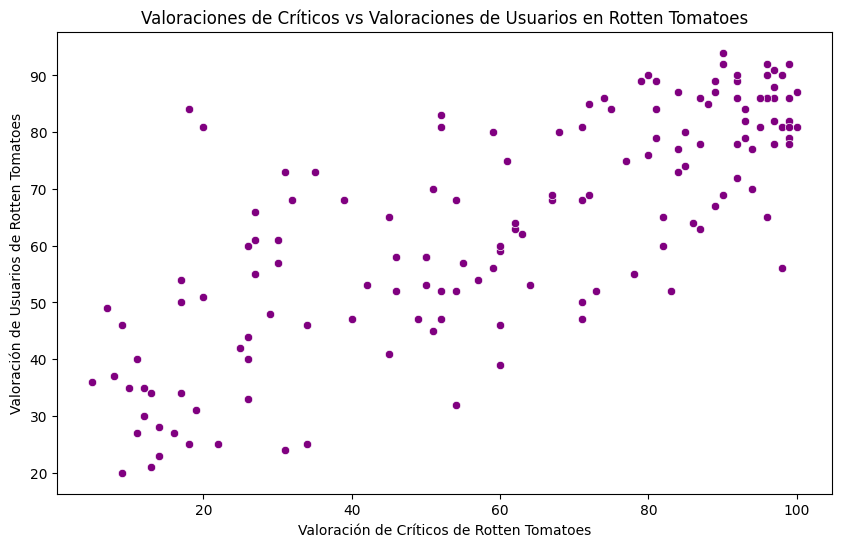

In [ ]:
# 2. Rotten_Diff =  Critics - User Score.
#Visualización de las valoraciones de críticos y usuarios en Rotten Tomatoes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=all_sites['RottenTomatoes'], y=all_sites['RottenTomatoes_User'], color='purple')
plt.title('Valoraciones de Críticos vs Valoraciones de Usuarios en Rotten Tomatoes')
plt.xlabel('Valoración de Críticos de Rotten Tomatoes')
plt.ylabel('Valoración de Usuarios de Rotten Tomatoes')
plt.show()

En este caso si vemos que mientras mayor la valoración de los usuarios tambien es mayor la valoración de los críticos de Rotten Tomatoes.

In [ ]:
# 3. Diferencia media absoluta
#Crear una nueva columna con la diferencia entre las valoraciones de los críticos y los usuarios
all_sites['DIFERENCIA_RT'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [ ]:
# 4. Visualización de la distribución de las diferencias y del valor absoluto de las diferencias
#Calcular la diferencia media absoluta
diferencia_media_absoluta = all_sites['DIFERENCIA_RT'].abs().mean()
print(f"Diferencia media absoluta entre las valoraciones de críticos y usuarios: {diferencia_media_absoluta:.2f}")

Diferencia media absoluta entre las valoraciones de críticos y usuarios: 15.10


Aún cuando tienen una relación directa las valoraciones, estas tienen una diferencia y no son exactas.

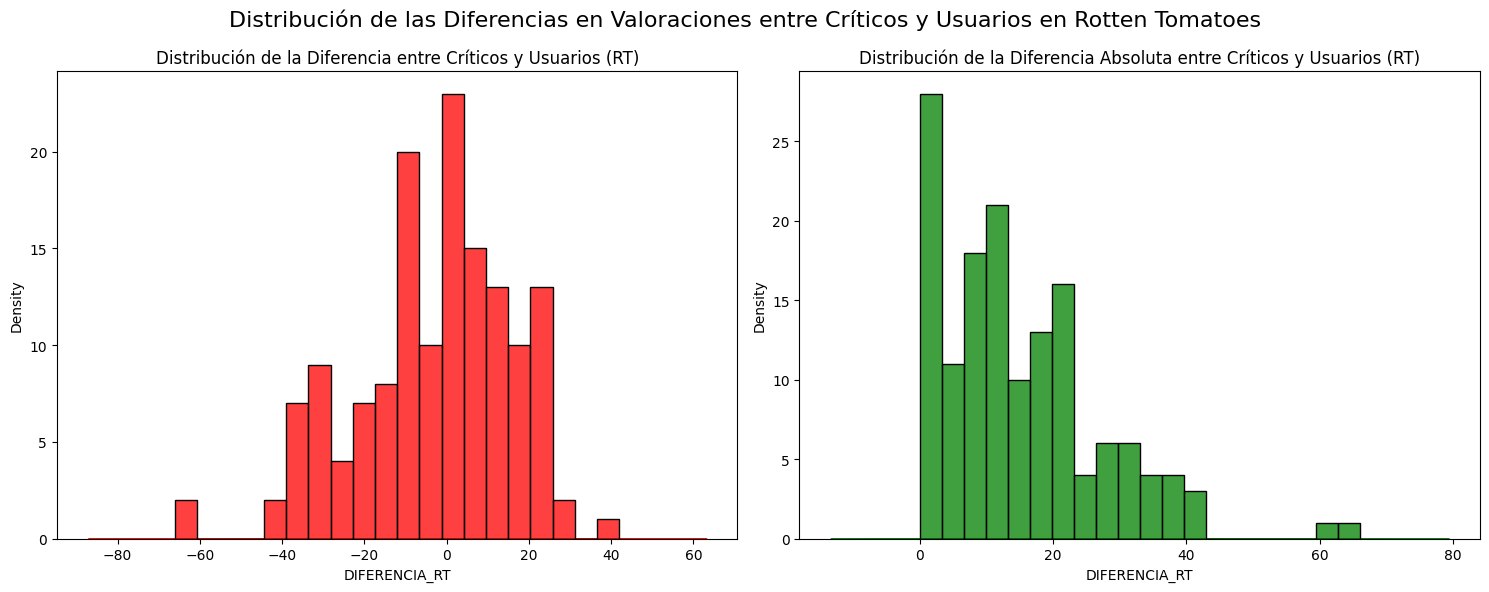

In [ ]:
# 5. Las 10 películas más valoradas por los usuarios en promedio que los críticos
#visualización de las distribuciones de las diferencias
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Distribución de la diferencia entre RT Critics y RT User
sns.kdeplot(all_sites['DIFERENCIA_RT'], ax=axes[0], fill=True, color='red', label='Diferencia entre Críticos y Usuarios')
sns.histplot(all_sites['DIFERENCIA_RT'], ax=axes[0], kde=False, color='red', bins=20, label='Histograma')
axes[0].set_title('Distribución de la Diferencia entre Críticos y Usuarios (RT)')

# Distribución de la diferencia en valor absoluto
sns.kdeplot(all_sites['DIFERENCIA_RT'].abs(), ax=axes[1], fill=True, color='green', label='Diferencia Absoluta')
sns.histplot(all_sites['DIFERENCIA_RT'].abs(), ax=axes[1], kde=False, color='green', bins=20, label='Histograma')
axes[1].set_title('Distribución de la Diferencia Absoluta entre Críticos y Usuarios (RT)')

# Título general
plt.suptitle('Distribución de las Diferencias en Valoraciones entre Críticos y Usuarios en Rotten Tomatoes', fontsize=16)
plt.tight_layout()
plt.show()

En el primer gráfico vemos que la mayoría de las diferencias están cerca de 0, lo que indica que en la mayoría de los casos, las valoraciones de críticos y usuarios son similares.
Hay valores negativos significativos, lo que sugiere que en algunos casos, los usuarios valoran una película mucho más que los críticos.
También hay algunos valores positivos (pero menos frecuentes), indicando que en algunas ocasiones los críticos valoran más que los usuarios.

En el segundo gráfico podría agregar que la magnitud de la diferencia entre las valoraciones de críticos y usuarios es menor para diferencias absolutas altas, indicando que son pocas las grandes discrepancias.

In [ ]:
# Las 10 películas con mejores valoraciones de críticos de películas que de usuarios
#Películas con la mayor diferencia
# 10 películas más valoradas por los usuarios que por los críticos (DIFERENCIA_RT positiva)
peliculas_mayor_valoracion_usuario = all_sites[all_sites['DIFERENCIA_RT'] > 0].sort_values('DIFERENCIA_RT', ascending=False).head(10)

# 10 películas con las mejores valoraciones de críticos que de usuarios (DIFERENCIA_RT negativa)
peliculas_mayor_valoracion_critico = all_sites[all_sites['DIFERENCIA_RT'] < 0].sort_values('DIFERENCIA_RT', ascending=True).head(10)

# Mostrar resultados
print("Las 10 películas más valoradas por los usuarios que por los críticos son:")
print(peliculas_mayor_valoracion_usuario[['FILM', 'DIFERENCIA_RT']])

print("\nLas 10 películas con mejores valoraciones de críticos que de usuarios son:")
print(peliculas_mayor_valoracion_critico[['FILM', 'DIFERENCIA_RT']])

Las 10 películas más valoradas por los usuarios que por los críticos son:
                                                FILM  DIFERENCIA_RT
69                                 Mr. Turner (2014)             42
112                                It Follows (2015)             31
115                         While We're Young (2015)             31
145               Kumiko, The Treasure Hunter (2015)             24
40                  I'll See You In My Dreams (2015)             24
37                              Welcome to Me (2015)             24
90   The SpongeBob Movie: Sponge Out of Water (2015)             23
116                      Clouds of Sils Maria (2015)             22
7                                    Top Five (2014)             22
87                                     Maggie (2015)             22

Las 10 películas con mejores valoraciones de críticos que de usuarios son:
                          FILM  DIFERENCIA_RT
3       Do You Believe? (2015)            -66
85        

Lo interesante de este punto es que podemos ver que las diferencias absolutas de las 10 películas más valoradas por los usuarios que por los críticos son menores en magnitud que las diferencias absolutas de las 10 películas más valoradas por los críticos que por los usuarios. Esto podría ocurrir porque las películas más valoradas por los usuarios apelan más a las emociones, gustos o tendencias populares entre los usuarios, pero no son necesariamente rechazadas por los críticos.y a que las peliculas más valoradas por los críticos tienen características más técnicas, artísticas o narrativas que los críticos valoran, pero que no conectan igual con el público general.

<font color='green'>Fin actividad 4</font>

### <font color='green'>**Actividad 5**</font>
## Comparación de las valoraciones de Fandango con MetaCritic

Ahora echemos un vistazo a las calificaciones de __MetaCritic__. Metacritic también muestra una calificación de usuario promedio en comparación con su calificación oficial mostrada.

1. Realice una visualización de dispersión de ambas variables.

2. Determine la diferencia comparando las calificaciones de los críticos y las calificaciones de los usuarios de __RT__. De forma similar a la __Actividad 4__ cree una nueva columna basada en la diferencia entre las calificaciones de los críticos y las calificaciones de los usuarios para MetaCritic. Calcule esto con `Metacritic - Metacritic_User`

3. Visualice las comparación de diferencias de __RT__ con las de __MetaCritic__.

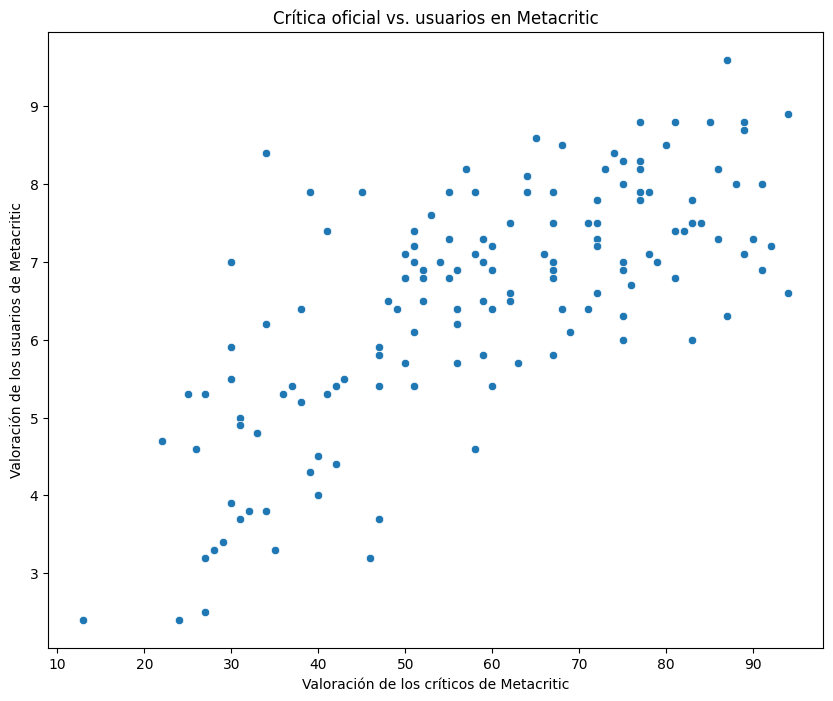

In [ ]:
# Tu código aquí ...
# 1. Visualización de dispersión (scatter) entre la crítica oficial y la de los usuarios
fig, ax = plt.subplots(1,1, figsize=(10,8) )
sns.scatterplot(x='Metacritic', y='Metacritic_User', data=all_sites, ax = ax )
plt.title('Crítica oficial vs. usuarios en Metacritic')
plt.xlabel('Valoración de los críticos de Metacritic')
plt.ylabel('Valoración de los usuarios de Metacritic')
plt.show()


A partir del gráfico de dispersión entre la crítica oficial y la crítica de los usuarios de Metacritic, se observa que estas valoraciones se relacionan entre sí bastante bien, de manera lineal y con una tendencia positiva. Para corroborarlo se calcula el coeficiente de correlación entre ambas columnas:

In [ ]:
correlation = all_sites['Metacritic'].corr(all_sites['Metacritic_User'])
print("La correlación entre la crítica oficial y la crítica de los usuarios en Metacritic es :", round(correlation,2))

La correlación entre la crítica oficial y la crítica de los usuarios en Metacritic es : 0.72


Esta es una correlación positiva y se considera buena, dando a entender que los usuarios de la plataforma Metacritic valoran las películas de manera similar a la misma plataforma, es decir, las películas que fueron mal valoradas por Metacritic también son mal valoradas por sus usuarios, de la misma manera que las películas bien valoradas por Metacritic tambien son bien valoradas por sus usuarios.


In [ ]:
# 2. Metacritic_Diff =  Criticos - Usuarios
all_sites['Metacritic_Diff'] =all_sites['Metacritic']-all_sites['Metacritic_User']

Cabe destacar que, a diferencia de Rotten Tomattoes, donde las escalas de valoración de los críticos oficiales y los usuarios son la misma, en Metacritic la escala de valoración de los usuarios tiene un máximo de 10 y la escala de los críticos tiene un máximo de 100. Así, es muy poco probable que alguna diferencia entre las valoraciones de criticos y usuarios de como resultado un número negativo. Más aún, calcular la diferencia entre criticas oficiales y de usuarios de Metacritic simplemente haciendo la resta no es correcto.

Para hacer comparables ambas valoraciones y obtener una diferencia entre críticos y usuarios de Metacritic, primero se multiplica por un factor de diez la valoracion de los usuarios, de manera que ambas escalas tengan un máximo de 100 y sean comparables.

In [ ]:
all_sites['Metacritic_Diff_misma_escala'] =all_sites['Metacritic']-all_sites['Metacritic_User']*10
all_sites['Metacritic_Diff_misma_escala_abs'] = all_sites['Metacritic_Diff_misma_escala'].abs()


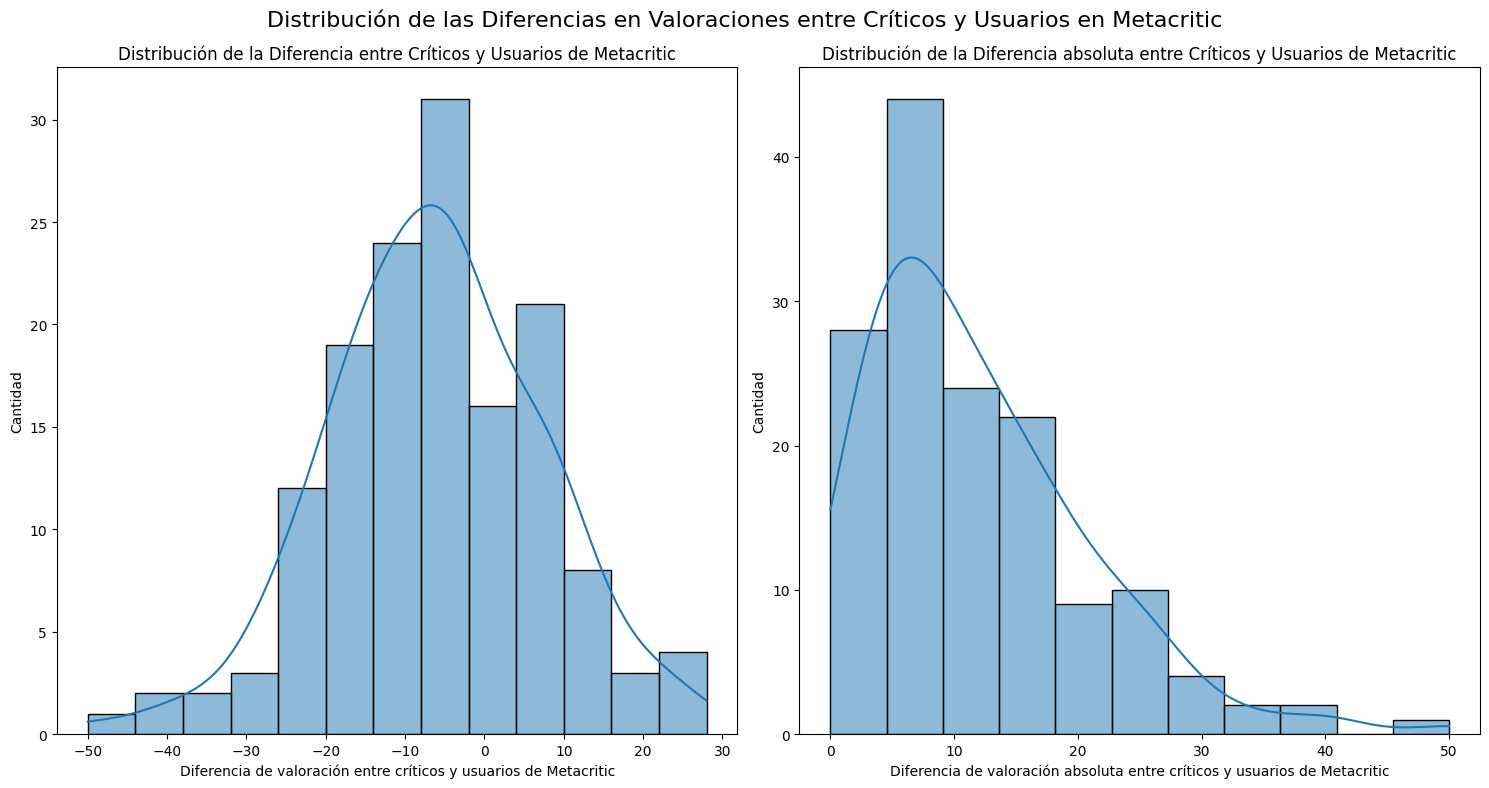

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,8) )
# Distribución de la diferencia entre Metacritic Critics y Metacritic User x 10
sns.histplot(x='Metacritic_Diff_misma_escala', data=all_sites, ax = ax[0], kde = True )
ax[0].set_title('Distribución de la Diferencia entre Críticos y Usuarios de Metacritic')
ax[0].set_xlabel('Diferencia de valoración entre críticos y usuarios de Metacritic')
ax[0].set_ylabel('Cantidad')

# Distribución de la diferencia entre Metacritic Critics y Metacritic User x 10 absoluto
sns.histplot(x='Metacritic_Diff_misma_escala_abs', data=all_sites, ax = ax[1], kde = True)
ax[1].set_title('Distribución de la Diferencia absoluta entre Críticos y Usuarios de Metacritic')
ax[1].set_xlabel('Diferencia de valoración absoluta entre críticos y usuarios de Metacritic')
ax[1].set_ylabel('Cantidad')

# Título general
plt.suptitle('Distribución de las Diferencias en Valoraciones entre Críticos y Usuarios en Metacritic', fontsize=16)
plt.tight_layout()
plt.show()

El análisis de las diferencias de valoración entre críticos y usarios de Metacritic se ve bastante similar el hecho para esta misma variable en Totten Tomatoes.

En el primer gráfico vemos que la mayoría de las diferencias están entre -10 y 10, lo que indica que en la mayoría de los casos, las valoraciones de críticos y usuarios son similares (las de los usuarios estan no mas de 10 puntos por encima  o por debajo  de la valoración de los críticos).

Hay valores negativos significativos, lo que sugiere que en algunos casos, los usuarios valoran una película mucho más que los críticos.
También hay algunos valores positivos, indicando que en algunas ocasiones los críticos valoran más que los usuarios.

En el segundo gráfico podría agregar que la magnitud de la diferencia entre las valoraciones de críticos y usuarios es menor para diferencias absolutas altas, indicando que son pocas las grandes discrepancias.

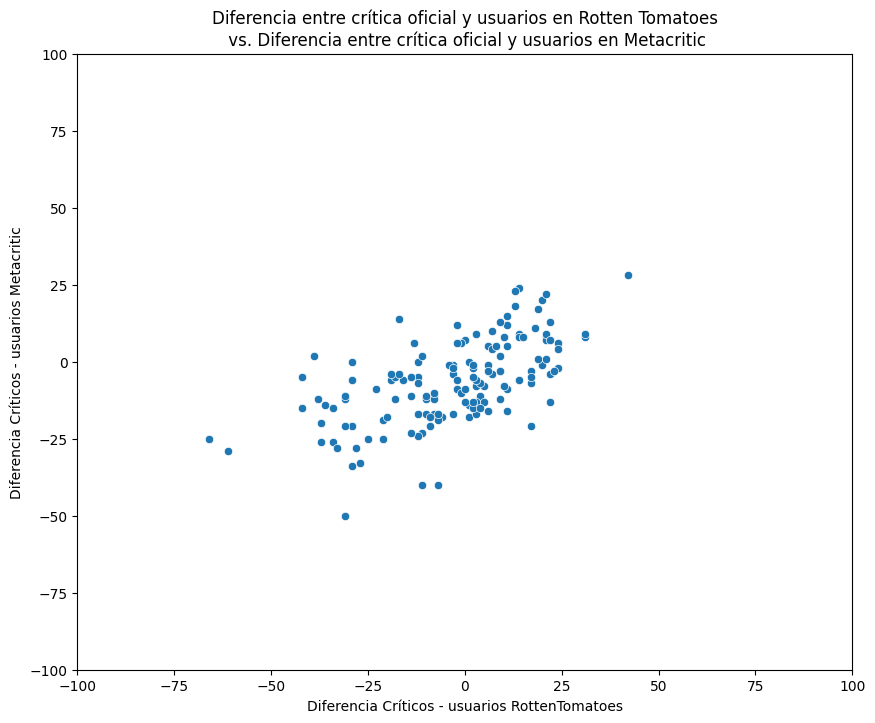

In [ ]:
# 3. Dispersión de diferencias
fig, ax = plt.subplots(1,1, figsize=(10,8) )
sns.scatterplot( x = 'DIFERENCIA_RT', y='Metacritic_Diff_misma_escala',data=all_sites, ax = ax)


ax.title.set_text('Diferencia entre crítica oficial y usuarios en Rotten Tomatoes\n vs. Diferencia entre crítica oficial y usuarios en Metacritic')
ax.set_xlabel('Diferencia Críticos - usuarios RottenTomatoes')
ax.set_ylabel('Diferencia Críticos - usuarios Metacritic')
plt.xlim(-100, 100)
plt.ylim(-100, 100)

plt.show()

A partir del gráfico de dispersión entre la diferencia de la crítica oficial y la crítica de los usuarios de Metacritic en comparación con la de Rotten Tomatoes, se observa que estas diferencias se relacionan linealmente entre sí de manera regular y con una tendencia positiva. Para corroborarlo se calcula el coeficiente de correlación entre ambas columnas:

In [ ]:
correlation = all_sites['DIFERENCIA_RT'].corr(all_sites['Metacritic_Diff_misma_escala'])
print("La correlación entre diferencia de criticas oficiales y de usuario en Metacritic y esta misma diferencia en Rotten Tomatoes es :", round(correlation,2))

La correlación entre diferencia de criticas oficiales y de usuario en Metacritic y esta misma diferencia en Rotten Tomatoes es : 0.61


Esta es una correlación positiva y se considera regularmente buena, dando a entender la diferencia de valoraciones entre criticos y usuarios de las plataformas Metacritic y Rotten Tomatoes son consistentes entre sí, es decir, las películas que tuvieron mayores diferencias de valoración entre críticos y usuarios en Metacritic, tambien tuvieron grandes diferencias de valoración entre críticos y usuarios de Rotten Tomatoes, de la misma manera cuando las diferencias son menores, lo son en ambas plataformas. Más aún, ambas plataformas se condicen bien respecto a cuando son los usuarios quienes valoran mejor una pelicula que los crítios o viceversa. Eso se observa en el gráfico de la distribución de los datos cuando la tendencia de las diferencias se mantienen al alejarse del valor 0 tanto hacia los negativos como los positivos.


En el siguiente gráfico tiepo displot se muestra que la gran mayoria de las diferencias entre valoraciónes se concetrnan cedrcanas a 0 en Rotten Tomatoes, es decir, las valoraciónes de criticos y susuarios son bastante similares, y en un valor cercano a -10 en Metacritic, es decir, los usuarios valoraron las películas con 10 puntos más que los críticos.

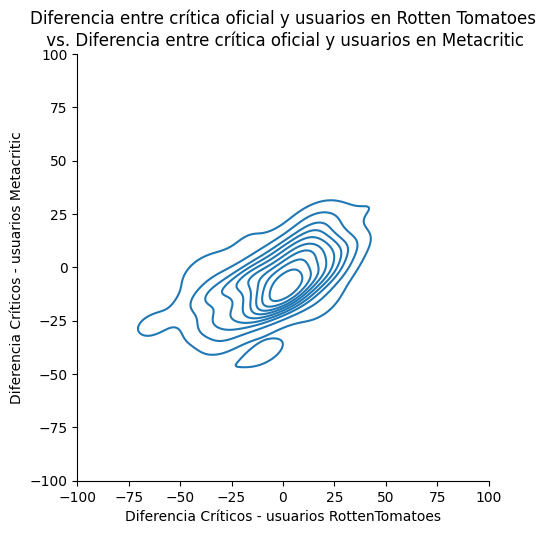

In [ ]:
sns.displot( x = 'DIFERENCIA_RT', y='Metacritic_Diff_misma_escala',data=all_sites, kind="kde")

plt.title('Diferencia entre crítica oficial y usuarios en Rotten Tomatoes\n vs. Diferencia entre crítica oficial y usuarios en Metacritic')
plt.xlabel('Diferencia Críticos - usuarios RottenTomatoes')
plt.ylabel('Diferencia Críticos - usuarios Metacritic')
plt.xlim(-100, 100)
plt.ylim(-100, 100)

plt.show()

<font color='green'>Fin actividad 5</font>

### <font color='green'>**Actividad 6**</font>
## Comparación de valoraciones de Fandago vs. All Sites

Explore si Fandango muestra artificialmente calificaciones más altas que las justificadas para impulsar la venta de boletos.

1. Combine ambos datasets (`Fandango` con `All_Sites`). ¿Cuántos registros se pierden en la fusión?
2. Normalice las columnas para que sus escalas sean comparables. Fandango utiliza una escala de $0-5$ para `STARS` y `RATINGS`.
3. Simplifique el DataFrame. Genere una copia con las valoraciones normalizadas. Incluya `STARS`y `RATING` desde Fandango.
4. Compare de la distribución de puntuaciones entre sitios. ¿Fandango muestra calificaciones anormalmente altas? Ya sabemos que su `RATIBG` mostrado es más alto que las valoraciones de usuarios (`STARS`), pero ¿son las calificaciones en sí mismas más altas que el promedio? Analice y comente.
5. Cree una gráfica `hisplot` comparando todas las puntuaciones normalizadas.
6. ¿Cómo se califican las peores películas en todos los sitios? Cree una visualización del tipo `clustermap` de todas las puntuaciones normalizadas. Investigue acerca de esta gráfica avanzada de `Seaborn`.
7. Según las calificaciones de los críticos de __RT__, ¿cuáles son las 10 películas con las calificaciones más bajas? ¿Cuáles son las puntuaciones normalizadas en los otros sitios para estas películas?

In [ ]:
# Tu código aquí ...
# 1. Merge de ambos datasets
# No todas las películas de la tabla Fandango están en la tabla All_Sites
# algunas películas de Fandango tienen muy pocas críticas o ninguna.
# Solo queremos comparar películas que están en ambos DataFrames,

df_fadango = fandango
df_allsite = all_sites

print(df_fadango.isnull().sum())
print('\n')
print(df_allsite.isnull().sum())
#No tiene Nulos

# Contar la cantidad de valores únicos en la columna 'FILM'
unique_film_fadango = df_fadango['FILM'].nunique()
unique_film_allsite = df_allsite['FILM'].nunique()

print(f"\nCantidad de valores únicos en la columna 'FILM' de Fandango: {unique_film_fadango}")
print(f"Cantidad de valores únicos en la columna 'FILM' de All_Sites: {unique_film_allsite}")



FILM      0
STARS     0
RATING    0
VOTES     0
dtype: int64


FILM                          0
RottenTomatoes                0
RottenTomatoes_User           0
Metacritic                    0
Metacritic_User               0
IMDB                          0
Metacritic_user_vote_count    0
IMDB_user_vote_count          0
dtype: int64

Cantidad de valores únicos en la columna 'FILM' de Fandango: 503
Cantidad de valores únicos en la columna 'FILM' de All_Sites: 146


In [ ]:
# Realizar la fusión de ambos DataFrames, excluyendo los que no estén
df_combined = pd.merge(df_fadango, df_allsite, on='FILM', how='inner')

display(df_combined.head())

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252


In [ ]:
# Ver cuántos registros se pierden
total_fadango = unique_film_fadango
total_allsite = unique_film_allsite

# Contar valores únicos después de la fusión
unique_film_combined = df_combined['FILM'].nunique()

# Calcular los valores únicos perdidos
lost_unique_film = (unique_film_fadango + unique_film_allsite) - 2 * unique_film_combined

# Mostrar los resultados
print(f"Valores únicos en df_fadango: {unique_film_fadango}")
print(f"Valores únicos en df_allsite: {unique_film_allsite}")
print(f"Valores únicos comunes después de la fusión: {unique_film_combined}")
print(f"Se pierden {lost_unique_film} valores únicos de FILM en la fusión.")

Valores únicos en df_fadango: 503
Valores únicos en df_allsite: 146
Valores únicos comunes después de la fusión: 145
Se pierden 359 valores únicos de FILM en la fusión.


Tenga en cuenta que RT, Metacritic e IMDB no usan una puntuación entre 0-5 estrellas como lo hace Fandango. Para hacer una comparación justa, necesitamos * normalizar * estos valores para que todos caigan entre 0 y 5 estrellas y la relación entre las reseñas se mantenga igual.


Tips:
1. https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

2. Otra forma simple de normalizar es dividiendo las escalas para asemejarlas a la de Fandango.
  * 100/20 = 5
  * 10/2 = 5

In [ ]:
# 2. Normalice las columnas para que sus escalas sean comparables. Fandango utiliza una escala de  0−5  para STARS y RATINGS.
display(df_combined.head())

#Pasar todo a escala de 0 -5
df_combined2= df_combined.copy()
#Tiene escala de 0-100
df_combined2['RottenTomatoes'] = df_combined['RottenTomatoes'] / 20
#Tiene escala de 0-100
df_combined2['RottenTomatoes_User'] = df_combined['RottenTomatoes_User'] / 20
#Tiene escala de 0 -100
df_combined2['Metacritic'] = df_combined['Metacritic'] / 20
#Tiene escala de 0 - 10
df_combined2['Metacritic_User'] = df_combined['Metacritic_User'] / 2
#Tiene escala de 0 - 10
df_combined2['IMDB'] = df_combined['IMDB'] / 2

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252


In [ ]:
#DF Normalizado para escala de 0 a 5
print('Tabla Normalizada con la misma escala')
display(df_combined2.head())

Tabla Normalizada con la misma escala


,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Fifty Shades of Grey (2015),4.0,3.9,34846,1.25,2.10,2.30,1.60,2.10,778,179506
1,Jurassic World (2015),4.5,4.5,34390,3.55,4.05,2.95,3.50,3.65,1281,241807
2,American Sniper (2015),5.0,4.8,34085,3.60,4.25,3.60,3.30,3.70,850,251856
3,Furious 7 (2015),5.0,4.8,33538,4.05,4.20,3.35,3.40,3.70,764,207211
4,Inside Out (2015),4.5,4.5,15749,4.90,4.50,4.70,4.45,4.30,807,96252


In [ ]:
# 3.Simplifique el DataFrame. Genere una copia con las valoraciones normalizadas. Incluya STARS y RATING desde Fandango.
df_normalized = df_combined2.copy()
df_normalized = df_combined2.drop('VOTES', axis=1)
df_normalized = df_normalized.drop('Metacritic_user_vote_count', axis=1)
df_normalized = df_normalized.drop('IMDB_user_vote_count', axis=1)

display(df_normalized.head())

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,Fifty Shades of Grey (2015),4.0,3.9,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,4.90,4.50,4.70,4.45,4.30


In [ ]:
# 4. Compare de la distribución de puntuaciones entre sitios.
# ¿Fandango muestra calificaciones anormalmente altas?
# Ya sabemos que su RATING mostrado es más alto que las valoraciones de usuarios (STARS),
# pero ¿son las calificaciones en sí mismas más altas que el promedio? Analice y comente

# Estadísticas
stats = df_normalized.describe()

print("Estadísticas:")
display(stats)



Estadísticas:


,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3.031724,3.184828,2.934828,3.254483,3.364828
std,0.541169,0.502437,1.508055,0.998737,0.976909,0.755441,0.478972
min,3.000000,2.700000,0.250000,1.000000,0.650000,1.200000,2.000000
25%,3.500000,3.500000,1.550000,2.500000,2.150000,2.850000,3.150000
50%,4.000000,3.900000,3.150000,3.300000,2.950000,3.400000,3.450000
75%,4.500000,4.200000,4.450000,4.050000,3.750000,3.750000,3.700000
max,5.000000,4.800000,5.000000,4.700000,4.700000,4.800000,4.300000


* Se logra observar que STARS Y RATING tienen distribuciones sesgadas
hacia valores altos, y sus promedios son significativamente mayores.
* Se logra observar hasta una diferencia de mas 1 punto en la calificación según el promedio

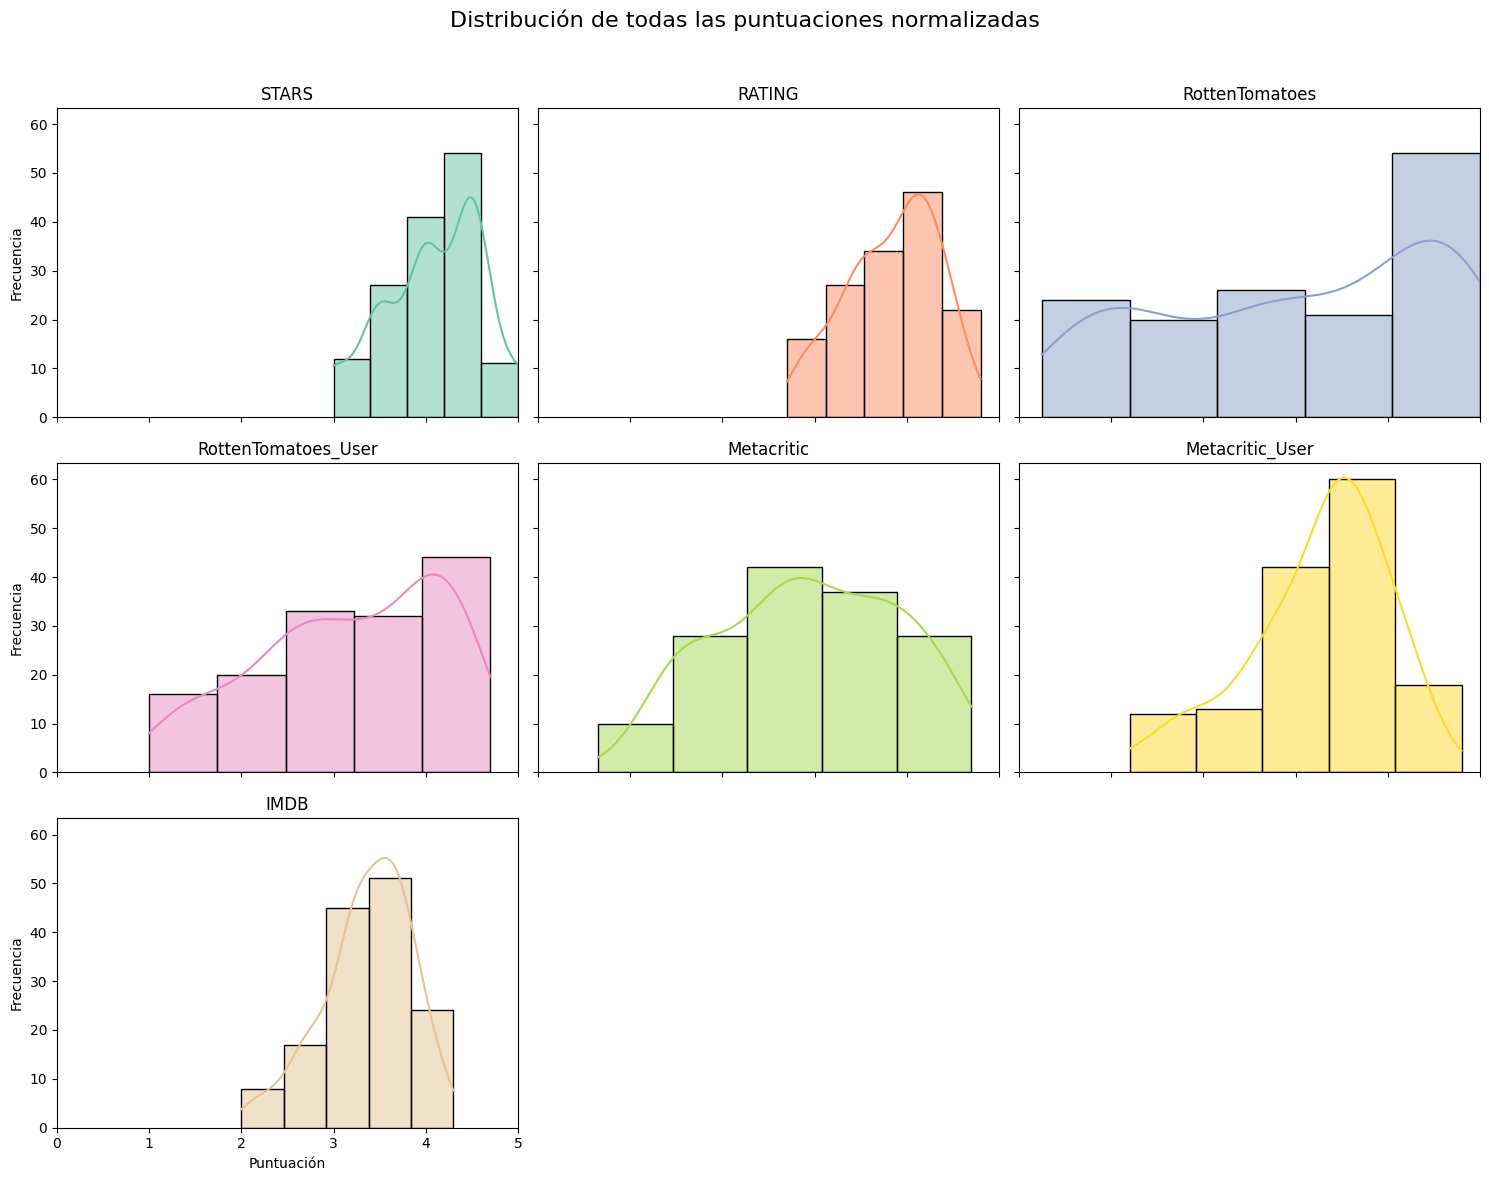

In [ ]:
# 5. Cree una gráfica hisplot comparando todas las puntuaciones normalizadas.

import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de la figura y los subgráficos
fig, axes = plt.subplots(3, 3, figsize=(15, 12), sharex=True, sharey=True)
columns = ['STARS', 'RATING', 'RottenTomatoes', 'RottenTomatoes_User',
           'Metacritic', 'Metacritic_User', 'IMDB']
axes = axes.flatten()

# Crear un histplot para cada columna en un subgráfico
for i, column in enumerate(columns):
    sns.histplot(df_normalized[column], kde=True, bins=5, ax=axes[i], color=sns.color_palette("Set2")[i])
    axes[i].set_title(column)  # Título del subgráfico
    axes[i].set_xlim(0, 5)  # Limitar el rango del eje X
    axes[i].set_xlabel('Puntuación')  # Etiqueta del eje X
    axes[i].set_ylabel('Frecuencia')  # Etiqueta del eje Y

# Eliminar subgráficos vacíos si no hay más columnas
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño
fig.suptitle('Distribución de todas las puntuaciones normalizadas', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

A partir de los histogramas anteriores, se puede  observar que las valoraciones de Fanddango (tanto STARS como RATING) no son menores a 3, y tienen una distribución bastante acotada, desde 3 a 5 strellas, a diferencia de las valoraciones de las otras plataformas, donde las valoraciones son más distribuídas, pudiendo se desde 1 a 5 estrellas.

<Figure size 1000x800 with 0 Axes>

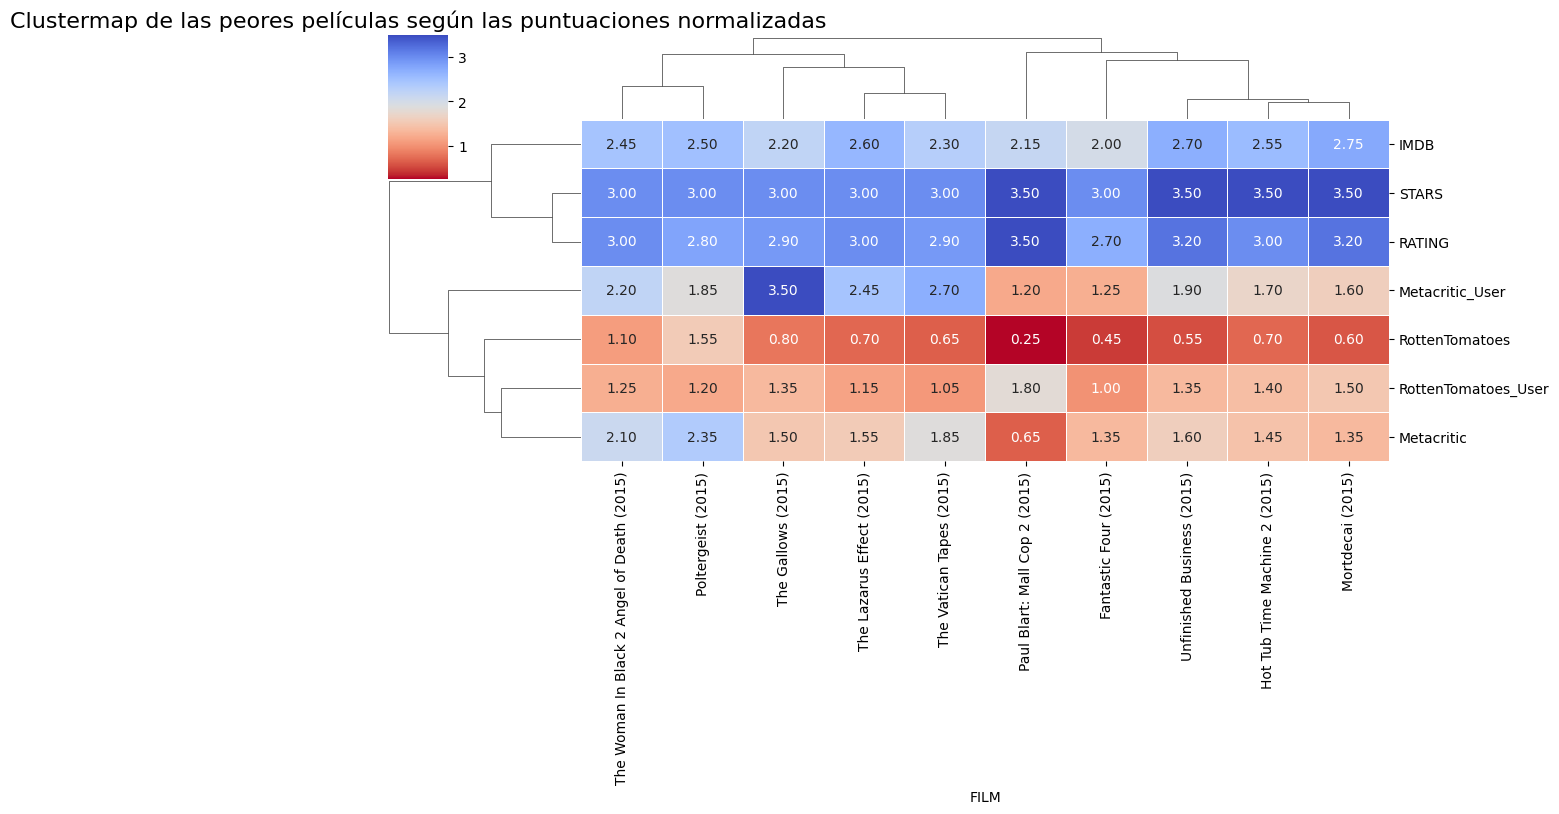

In [ ]:
# 6. ¿Cómo se califican las peores películas en todos los sitios?
# Cree una visualización del tipo clustermap de todas las puntuaciones normalizadas.
# Investigue acerca de esta gráfica avanzada de Seaborn.

# Calcular el promedio de las puntuaciones normalizadas (solo columnas numéricas)
df_normalized['Average_Score'] = df_normalized[['STARS', 'RATING', 'RottenTomatoes',
                                                'RottenTomatoes_User', 'Metacritic',
                                                'Metacritic_User', 'IMDB']].mean(axis=1)

# Seleccionar las 10 películas con las calificaciones más bajas en base al Promedio
df_worst_movies = df_normalized.nsmallest(10, 'Average_Score')

# Eliminar la columna de puntaje promedio y usar solo las puntuaciones normalizadas
df_worst_movies = df_worst_movies.drop(columns=['Average_Score'])

# Crear un clustermap
plt.figure(figsize=(10, 8))
sns.clustermap(
    df_worst_movies.set_index('FILM').T,  # Transponer para comparar sitios entre películas
    cmap="coolwarm_r",  # Paleta de colores
    method='average',  # Método de agrupamiento (puedes probar 'single', 'ward', etc.)
    annot=True,  # Mostrar los valores en el mapa
    fmt=".2f",  # Formato de los valores numéricos
    linewidths=0.5,  # Separación entre celdas
    figsize=(12, 8)  # Tamaño del gráfico
)

# Añadir título general
plt.title('Clustermap de las peores películas según las puntuaciones normalizadas', fontsize=16)
plt.show()

Se este grafico se puede observar que para las 10 perores peliculas evaluadas, la valoración de Fanfango es sistematicamente más alta que todos los otros sitios, en al menos 1 punto de diferencia.

Tambien se observa que la plataforma con menores valoraciones de las peores peliculas son los críticos de Rotten Tomatoes.

La pelicula donde existe mayores diferencias de valoracion en cada sitios es  ["Paul Blart: Mall Cop 2"](https://www.imdb.com/title/tt3450650/mediaviewer/rm1519382784/?ref_=tt_ov_i), donde la peor valoración la dio Rotten Tomatoes con 0.25 y Fandango le dio una valoración de 3.5 , es decir, más de 3 puntos de diferencia.

In [ ]:
# 7. Según las calificaciones de los críticos de RT, ¿cuáles son las 10 películas con las calificaciones más bajas?
# ¿Cuáles son las puntuaciones normalizadas en los otros sitios para estas películas?
# TOMARE QUE RT Criticos es RottenTomatoes


df_worst_movies = df_normalized.nsmallest(10, 'RottenTomatoes')

#display(df_worst_movies.head(10))
nuevo_indice = range(1, 11)
# Asignar el nuevo índice al DataFrame
df_worst_movies.index = nuevo_indice

df_worst_movies[['FILM', 'RottenTomatoes', 'STARS', 'RATING', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB']]



,FILM,RottenTomatoes,STARS,RATING,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
1,Paul Blart: Mall Cop 2 (2015),0.25,3.5,3.5,1.80,0.65,1.20,2.15
2,Hitman: Agent 47 (2015),0.35,4.0,3.9,2.45,1.40,1.65,2.95
3,Hot Pursuit (2015),0.40,4.0,3.7,1.85,1.55,1.85,2.45
4,Taken 3 (2015),0.45,4.5,4.1,2.30,1.30,2.30,3.05
5,Fantastic Four (2015),0.45,3.0,2.7,1.00,1.35,1.25,2.00
6,The Boy Next Door (2015),0.50,4.0,3.6,1.75,1.50,2.75,2.30
7,Unfinished Business (2015),0.55,3.5,3.2,1.35,1.60,1.90,2.70
8,The Loft (2015),0.55,4.0,3.6,2.00,1.20,1.20,3.15
9,Seventh Son (2015),0.60,3.5,3.2,1.75,1.50,1.95,2.75
10,Mortdecai (2015),0.60,3.5,3.2,1.50,1.35,1.60,2.75


De esta tabla tambien se observa que las valoraciones de los críticos de Rotten Tomatoes son las mpás bajas para las 10 peores peliculas, y en general las valoraciones de los otros sitios son en torno a 1 punto mayores,

<font color='green'>Fin actividad 6</font>

#Preguntas de investigación

Finalmente, luego del análisis de las valoraciones de películas en distintos sitios y comparandolas con Fandango, podemos responder las preguntas de invesitgación

 1. ***¿Tienen Fandango alguna predisposición a calificar las películas por encima de lo que deberían calificar?***

  - A traves de su distribución (Act6 Punto 4) se logra determinar que la media STARS Y RATING son mayores a todos los demás sitios.
  - También sus notas mínimas son 3 y 2,7, muy por encima de las mínimas de los otros sitios a analizar.
  - Sus cuartiles Q1, Q2, Q3 también son mayores a los otros sitios por lo que tiene una mayor concentración a calificaciones más altas
  - Las distribuciones están sesgadas hacia valores más altos en Fandango, en donde se confirma con los graficos compararitivos hisplot (Act6 Punto5)

  Se concluye que Fadango tiene predisposición a calificar las peliculas por encima que lo sitios comparados.


 2. ***¿Hay evidencias de conflicto de interés en un sitio web que nos entrega las calificaciones de las películas y que, además, nos vende entradas?***

  Efectivamente, el hecho de que Fandango entregue calificaciones y además venda entradas para verlas, genera un conflicto de interes. Al hacer el analisis estadistico y comparativo se encuentran evidencias de que Fandango sobrecalifica la valoración de las películas, incentivando que la gente vaya a verlas al cine y por lo tanto, aumentando sus ingresos con la venta de entradas.

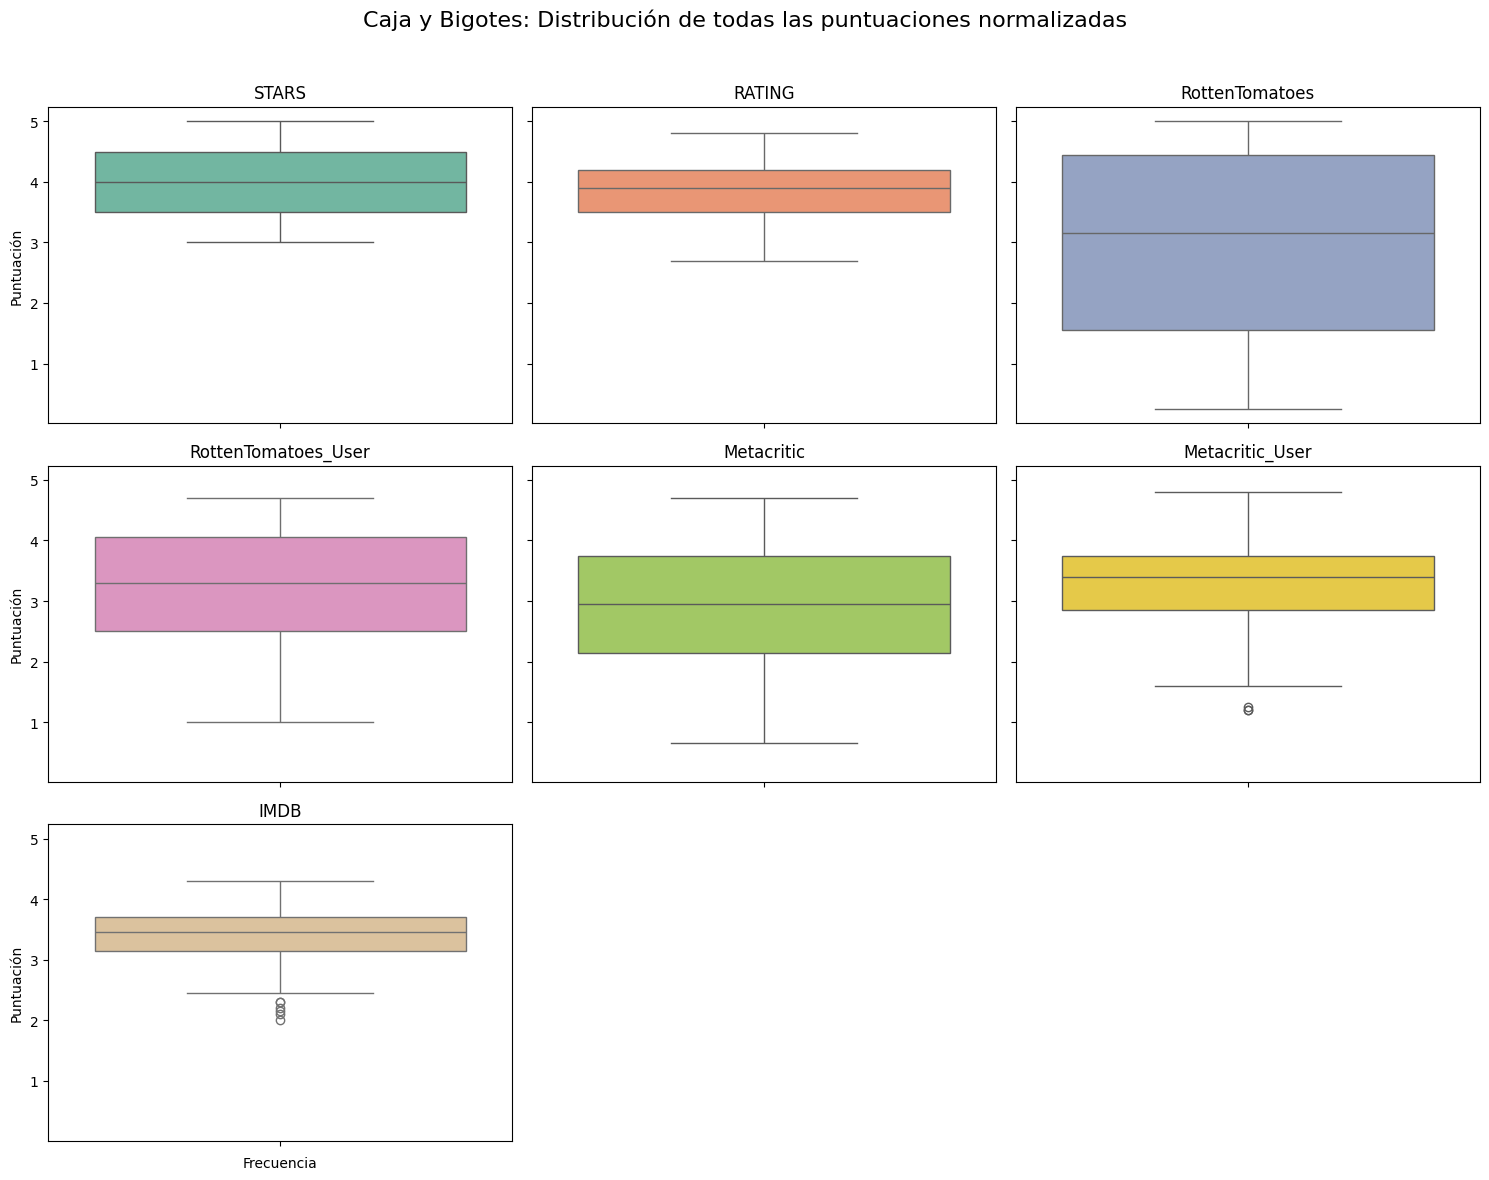

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Configuración de la figura y los subgráficos
# fig, axes = plt.subplots(3, 3, figsize=(15, 12), sharex=True, sharey=True)
# columns = ['STARS', 'RATING', 'RottenTomatoes', 'RottenTomatoes_User',
#            'Metacritic', 'Metacritic_User', 'IMDB']
# axes = axes.flatten()

# # Crear un boxplot vertical para cada columna en un subgráfico
# for i, column in enumerate(columns):
#     sns.boxplot(y=df_normalized[column], ax=axes[i], color=sns.color_palette("Set2")[i])
#     axes[i].set_title(column)  # Título del subgráfico
#     axes[i].set_ylabel('Puntuación')  # Etiqueta del eje Y
#     axes[i].set_xlabel('Frecuencia')  # Etiqueta del eje X

# # Eliminar subgráficos vacíos si no hay más columnas
# for j in range(len(columns), len(axes)):
#     fig.delaxes(axes[j])

# # Ajustar el diseño
# fig.suptitle('Caja y Bigotes: Distribución de todas las puntuaciones normalizadas', fontsize=16)
# fig.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()